In [6]:
## Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

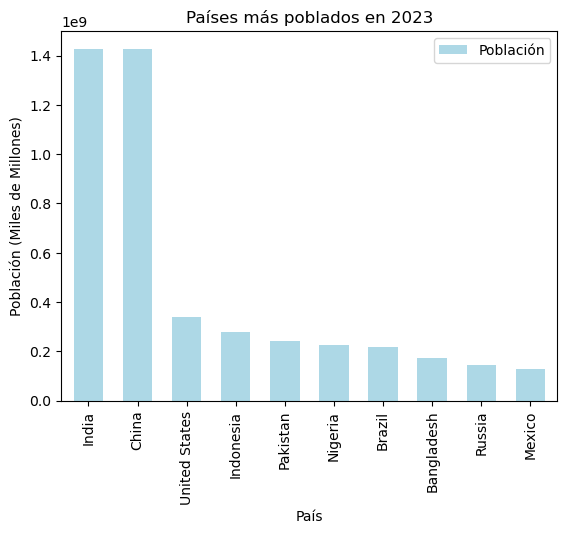

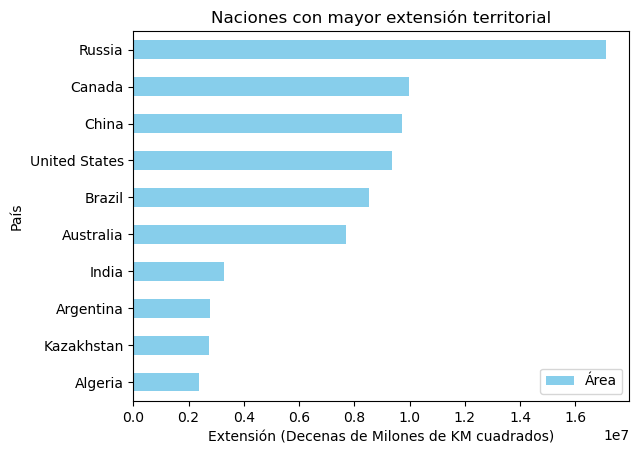

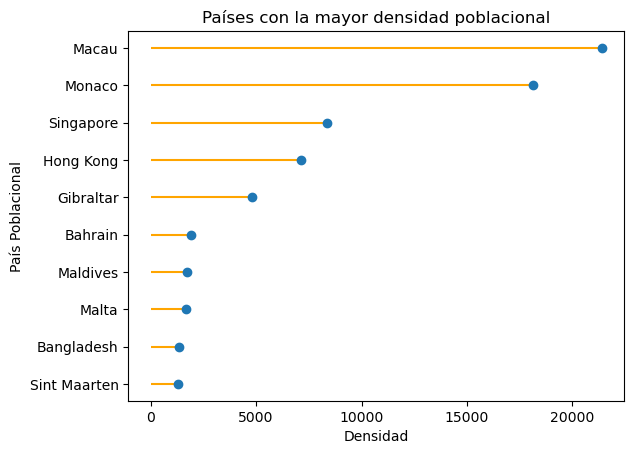

In [2]:
# Obtener los datos a analizar
df = pd.read_csv('countriestable.csv')
df.head()

## Análisis descriptivo
## Países con mayor número de habitantes
top = df.nlargest(10, 'pop2023')
top
## Gráfico de los países con mayor número de habitantes
top.plot(kind = 'bar', x = 'country', y = 'pop2023', label = 'Población' ,color = 'lightblue', width = 0.6)
plt.xlabel('País')
plt.ylabel('Población (Miles de Millones)')
plt.title('Países más poblados en 2023')
plt.show()

## Países más grandes
areatop = df.nlargest(10, 'area')
## Establecer el orden de menor a mayor
areatop = areatop.sort_values(by = 'area', ascending = True)
areatop
## Gráfico de los países más grandes
areatop.plot(kind = 'barh', x = 'country', y = 'area', color = 'skyblue', label = 'Área', width = 0.5)
plt.xlabel('Extensión (Decenas de Milones de KM cuadrados)')
plt.ylabel('País')
plt.title('Naciones con mayor extensión territorial')
plt.show()

## Países con mayor densidad poblacional
dens = df.nlargest(10, 'density')
#dens = dens.sort_values(by = 'density', ascending = True)
dens
## Gráfico
ordered = dens.sort_values(by= 'density')
m_range = range(1,len(dens.index)+1)
plt.hlines(y=m_range, xmin=0, xmax=ordered['density'], color='orange')
plt.plot(ordered['density'], m_range, "o")

## Agregar etiquetas
plt.yticks(m_range, ordered['country'])
plt.title('Países con la mayor densidad poblacional')
plt.xlabel('Densidad')
plt.ylabel('País Poblacional')
plt.show()

0      0.418400
1     -0.011300
2      0.058100
3      0.072700
4      0.149500
         ...   
229    0.010306
230    0.010306
231    0.000000
232    0.010306
233    0.010306
Name: netChange, Length: 234, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.540
Date:                Tue, 02 Apr 2024   Prob (F-statistic):             0.0344
Time:                        14:12:15   Log-Likelihood:                 557.32
No. Observations:                 187   AIC:                            -1111.
Df Residuals:                     185   BIC:                            -1104.
Df Model:                           1                                         
Covariance Type:            nonrobust                               

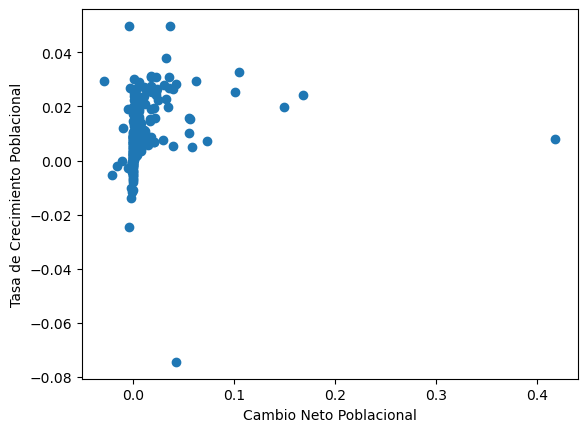

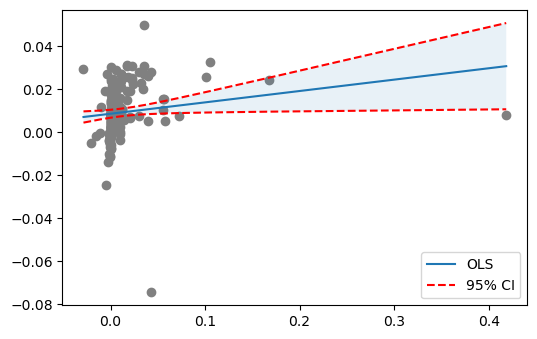

In [3]:
##### AJUSTE DE UN MODELO DE REGRESIÓN LINEAL SIMPLE
## Relación entre el cambio neto y la tasa de crecimiento
x = df['netChange']
y = df['growthRate']
plt.scatter(x,y)
plt.xlabel('Cambio Neto Poblacional')
plt.ylabel('Tasa de Crecimiento Poblacional')

## Limpieza de la base, se encontraron valores faltantes
## Sustituir valores faltantes por la media de dichos valores
x = x.fillna(x.mean())
y = y.fillna(y.mean())
print(x)

## Dividir los datos en muestra de entrenamiento y de prueba
x_train, x_test, y_train, y_test = train_test_split(
                                            x.values.reshape(-1,1),
                                            y.values.reshape(-1,1),
                                            train_size = 0.8,
                                            random_state = 123,
                                            shuffle = True
                                           )
## Ajuste del modelo de regresión
x_train = sm.add_constant(x_train, prepend = True)
modelo = sm.OLS(endog = y_train, exog = x_train,)
modelo = modelo.fit()
print(modelo.summary())

## Obtención de los Intervalos de confianza
modelo.conf_int(alpha = 0.05)

## Llevar a cabo las predicciones
pred = modelo.predict(x_train)
pred

## Predicciones con intervalos de confianza del 95%
predicciones = modelo.get_prediction(exog = x_train).summary_frame(alpha = 0.05)
predicciones.head(5)

## Gráfico del modelo
predicciones = modelo.get_prediction(exog = x_train).summary_frame(alpha = 0.05)
predicciones['x'] = x_train[:,1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

fig, ax = plt.subplots(figsize= (6, 3.84))
ax.scatter(predicciones['x'], predicciones['y'], marker = 'o',color = 'gray')
ax.plot(predicciones['x'],predicciones['mean'], linestyle = '-', label = 'OLS')
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

## El cambio neto poblacional no tiene relación con la tasa de crecimiento

In [7]:
########### ANÁLISIS CLUSTER
## Tomar en cuenta sólo las variables de interés para hacer las agrupaciones
datos = df.loc[:,['country','area','netChange','growthRate','worldPercentage','density','pop2023']]
datos.head()

## Borrar la variable que contiene el nombre del país
datos = datos.drop(['country'], axis = 1) 
datos.head()

## Estandarizar las variables
escalador = MinMaxScaler().fit(datos.values)
dataesc = pd.DataFrame(escalador.transform(datos.values))
dataesc.head()

## Mostrar si la data tiene NA's
print('Datos nulos en el DataFrame')
print(dataesc.isnull())

## Sustituir los valores faltantes con la media de cada variable
col_m = dataesc.mean()
dataesc = dataesc.fillna(col_m)
dataesc.isnull()

Datos nulos en el DataFrame
         0      1      2      3      4      5
0    False  False  False  False  False  False
1    False  False  False  False  False  False
2    False  False  False  False  False  False
3    False  False  False  False  False  False
4    False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...
229  False   True  False   True  False  False
230  False   True  False   True  False  False
231  False  False  False   True  False  False
232  False   True  False   True  False  False
233  False   True  False   True  False  False

[234 rows x 6 columns]


,0,1,2,3,4,5
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
229,False,False,False,False,False,False
230,False,False,False,False,False,False
231,False,False,False,False,False,False
232,False,False,False,False,False,False


C:\Users\PROPIETARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PROPIETARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PROPIETARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PROPIETARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows 

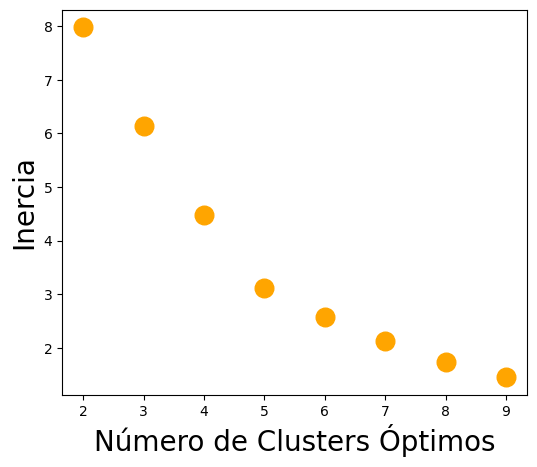

C:\Users\PROPIETARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PROPIETARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


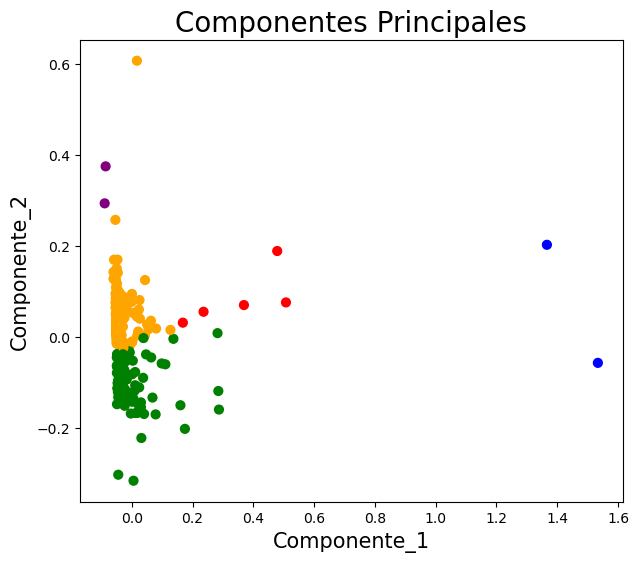

In [8]:
## Determinar el número óptimo de clusters con el método del codo
## Método del codo
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(dataesc.values)
    inercias.append(kmeans.inertia_)
    
plt.figure(figsize = (6,5), dpi = 100)
plt.scatter(range(2,10), inercias, marker = 'o', s = 180, color = 'orange')
plt.xlabel('Número de Clusters Óptimos', fontsize = 20)
plt.ylabel('Inercia', fontsize = 20)
plt.show()

## Aplicar el algoritmo K-Means
import random

clustering = KMeans(n_clusters = 5, max_iter = 300, random_state = 123)
clustering.fit(dataesc)

## Agregar la clasificación a los datos
datos['Clusters'] = clustering.labels_
datos.head()

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(dataesc)
pca_data_df = pd.DataFrame(data = pca_data, columns = ['Componente_1','Componente_2'])
pca_nombres_data = pd.concat([pca_data_df, datos[['Clusters']]], axis = 1)
pca_nombres_data

## Graficar los clusters con los PC
fig = plt.figure(figsize = (7,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente_1', fontsize = 15)
ax.set_ylabel('Componente_2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(['green', 'blue','orange','red','purple'])
ax.scatter(x = pca_nombres_data.Componente_1, y = pca_nombres_data.Componente_2,
           c = color_theme[pca_nombres_data.Clusters], s = 40)

plt.show()

,country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,Cluster
0,India,1,3287590.0,2973190.0,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,356,696828385,1059633675,1240613620,1417173173,1428627663,1514994080,1670490596,1
1,China,2,9706961.0,9424702.9,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,156,982372466,1264099069,1348191368,1425887337,1425671352,1415605906,1312636325,1
2,United States,3,9372610.0,9147420.0,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,840,223140018,282398554,311182845,338289857,339996563,352162301,375391963,3
3,Indonesia,4,1904569.0,1877519.0,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,360,148177096,214072421,244016173,275501339,277534122,292150100,317225213,0
4,Pakistan,5,881912.0,770880.0,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,586,80624057,154369924,194454498,235824862,240485658,274029836,367808468,0


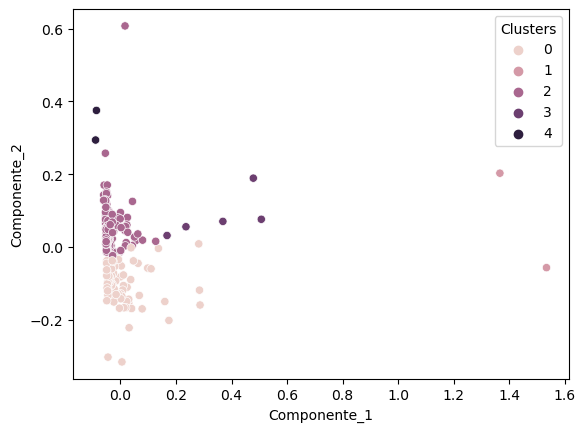

In [9]:
color_theme = np.array(['green', 'blue','orange','red','purple'])
sns.scatterplot(data = pca_nombres_data, x = 'Componente_1', y = 'Componente_2', hue = 'Clusters')

## Agregar la variable Cluster a la data original
df['Cluster'] = clustering.labels_
df.head()